In [27]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import os
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import regularizers
from keras.utils import to_categorical


ImportError: cannot import name 'train_test_split' from 'sklearn' (c:\Users\corra\anaconda3\lib\site-packages\sklearn\__init__.py)

In [33]:
# Load the data into a pandas DataFrame
print(os.getcwd())
df = pd.read_csv(
    filepath_or_buffer=os.getcwd()+'/../../data/monks/monks-1.train',
    names=['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id'],
    delimiter=' '
)

# Display the loaded data
df

c:\Users\corra\Documents\GitHub\Machine_Learning_Project\frameworks\tfkeras


,target,col1,col2,col3,col4,col5,col6,id
NaN,1,1,1,1,1,3,1,data_5
NaN,1,1,1,1,1,3,2,data_6
NaN,1,1,1,1,3,2,1,data_19
NaN,1,1,1,1,3,3,2,data_22
NaN,1,1,1,2,1,2,1,data_27
...,...,...,...,...,...,...,...,...
NaN,1,3,3,2,1,4,2,data_416
NaN,1,3,3,2,3,1,2,data_426
NaN,1,3,3,2,3,2,2,data_428
NaN,1,3,3,2,3,3,2,data_430


In [34]:
# Initializing labels/targets vector
y = df['target'].values.astype(float)

# Drop of the IDs and the targets
df = df.drop(columns=['target','id'], axis=1)

# Initializing the one-hot DataFrame
df_copy = df.copy(deep=True)

# Iteration on the columns of the DataFrame
for column in df.columns:

    # Creation of the one-hot encoding's columns
    df_one_hot = pd.get_dummies(df[column], dtype=float)

    # Change the name of the columns
    df_one_hot = df_one_hot.set_axis([column+'_'+str(col) for col in df_one_hot.columns], axis=1)

    # Drop of the initial column
    df_copy.drop(labels=column, axis=1, inplace=True)

    # Concatenation of the new columns to the DataFrame
    df_copy = pd.concat([df_copy,df_one_hot], axis=1)


# Columns to drop
#columns_to_drop = ['col1_2', 'col1_3',	'col2_2', 'col2_3',  'col3_2',  'col4_2', 'col4_3', 'col5_2', 'col5_3', 'col5_4', 'col6_2']

# Drop the specified columns
#df_copy = df_copy.drop(columns=columns_to_drop)

# Print of the obtained DataFrame   col1_2	col1_3	 col2_2	col2_3  col3_2	col3_3  col4_2	col4_3	col5_2	col5_3 col6_2		
df_copy

,col1_1,col1_2,col1_3,col2_1,col2_2,col2_3,col3_1,col3_2,col4_1,col4_2,col4_3,col5_1,col5_2,col5_3,col5_4,col6_1,col6_2
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [39]:
# Parameters' space for Grid Search
param_space = {
    'units': [3, 4],
    'optimizer': ['sgd'],
    'learning_rate': [0.08, 0.09, 0.1, 0.2],
    'batch_size': [8, 16],
    'epochs': [375],
    'weight_decay': [0.1, 0.2, 0.3],
    'momentum': [0.6, 0.7, 0.8],
    'loss': ['binary_crossentropy'],
    'activation': ['relu'],
    'output_activation': ['sigmoid'],
    'metrics': ['accuracy']
}

# Parameters' space for Grid Search (accuracy=0.89)
#param_space = {
    #'units': [3, 4],
    #'optimizer': ['sgd'],
    #'learning_rate': [0.01, 0.05, 0.1, 0.2],
    #'batch_size': [15, 16, 17],
    #'epochs': [1250, 1500, 1750],
    #'weight_decay': [0.005, 0.01],
    #'momentum': [0.7, 0.8, 0.9],
    #'loss': ['binary_crossentropy'] #['log_loss', 'binary_crossentropy']
#}

## Model Selection

Trial  0: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231E4FF8F40>, Learning Rate=0.08, Weight Decay=0.3, Epochs=375, Batch Size=4, Momentum=0.6 Training Accuracy=0.7661, Validation Accuracy=0.5806


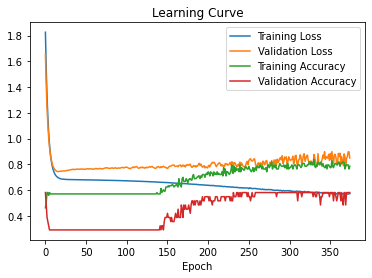

Trial  1: Units=4, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231FB8183D0>, Learning Rate=0.1, Weight Decay=0.3, Epochs=375, Batch Size=8, Momentum=0.7 Training Accuracy=0.7258, Validation Accuracy=0.5484


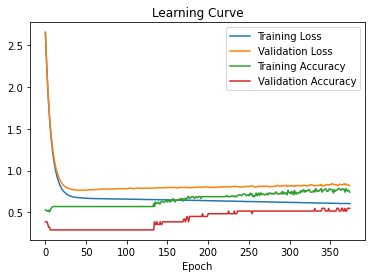

Trial  2: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231FC94E7C0>, Learning Rate=0.08, Weight Decay=0.3, Epochs=375, Batch Size=8, Momentum=0.8 Training Accuracy=0.7903, Validation Accuracy=0.5806


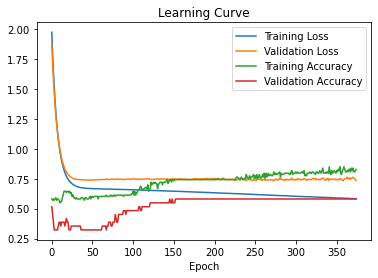

Trial  3: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231FCA9EDC0>, Learning Rate=0.1, Weight Decay=0.2, Epochs=375, Batch Size=4, Momentum=0.8 Training Accuracy=0.7500, Validation Accuracy=0.5806


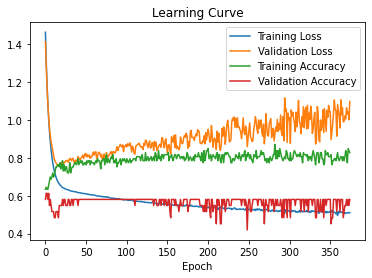

Trial  4: Units=4, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231FDCDF250>, Learning Rate=0.1, Weight Decay=0.3, Epochs=375, Batch Size=4, Momentum=0.8 Training Accuracy=0.7500, Validation Accuracy=0.5484


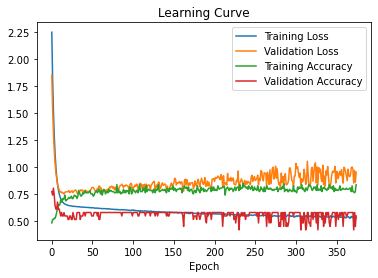

Trial  5: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231FDE85550>, Learning Rate=0.1, Weight Decay=0.1, Epochs=375, Batch Size=8, Momentum=0.8 Training Accuracy=0.7581, Validation Accuracy=0.5806


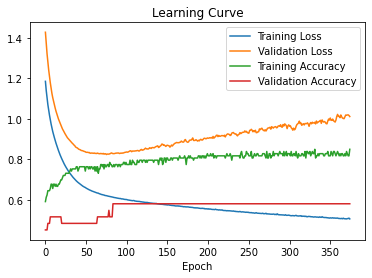

Trial  6: Units=4, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231FB77CD30>, Learning Rate=0.09, Weight Decay=0.3, Epochs=375, Batch Size=6, Momentum=0.7 Training Accuracy=0.7419, Validation Accuracy=0.5806


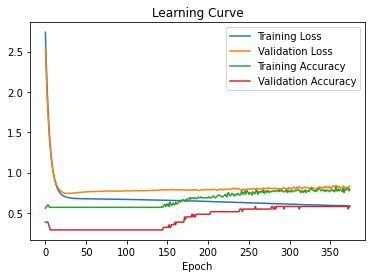

Trial  7: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231FA28C100>, Learning Rate=0.09, Weight Decay=0.2, Epochs=375, Batch Size=8, Momentum=0.8 Training Accuracy=0.7581, Validation Accuracy=0.5806


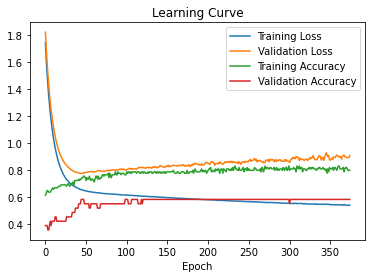

Trial  8: Units=4, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231E9A72550>, Learning Rate=0.09, Weight Decay=0.2, Epochs=375, Batch Size=4, Momentum=0.8 Training Accuracy=0.7903, Validation Accuracy=0.4516


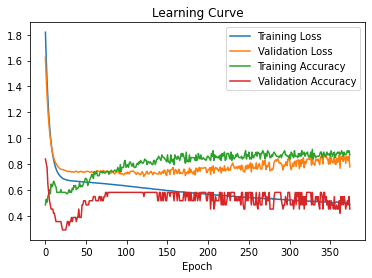

Trial  9: Units=4, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231DB99F190>, Learning Rate=0.08, Weight Decay=0.3, Epochs=375, Batch Size=6, Momentum=0.6 Training Accuracy=0.8065, Validation Accuracy=0.5484


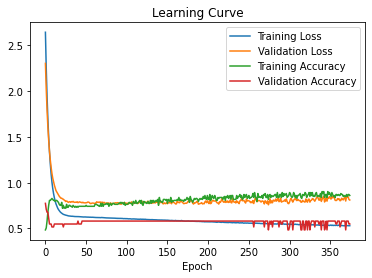

Trial 10: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231E60EEAC0>, Learning Rate=0.08, Weight Decay=0.3, Epochs=375, Batch Size=8, Momentum=0.8 Training Accuracy=0.7823, Validation Accuracy=0.5484


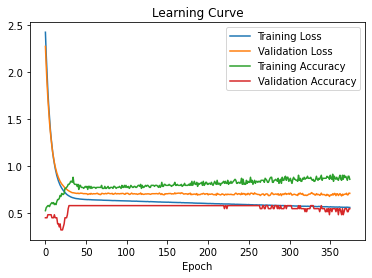

Trial 11: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231E1652580>, Learning Rate=0.09, Weight Decay=0.2, Epochs=375, Batch Size=4, Momentum=0.7 Training Accuracy=0.7742, Validation Accuracy=0.5806


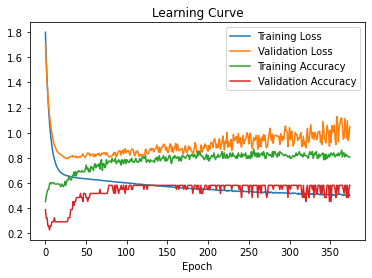

Trial 12: Units=4, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231EAE29850>, Learning Rate=0.2, Weight Decay=0.1, Epochs=375, Batch Size=4, Momentum=0.8 Training Accuracy=0.8387, Validation Accuracy=0.4516


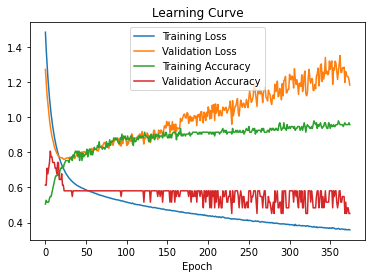

Trial 13: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231F1D58DF0>, Learning Rate=0.1, Weight Decay=0.2, Epochs=375, Batch Size=4, Momentum=0.8 Training Accuracy=0.7581, Validation Accuracy=0.5806


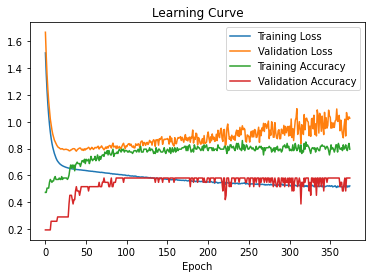

Trial 14: Units=3, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231F469C040>, Learning Rate=0.2, Weight Decay=0.1, Epochs=375, Batch Size=6, Momentum=0.8 Training Accuracy=0.7581, Validation Accuracy=0.5806


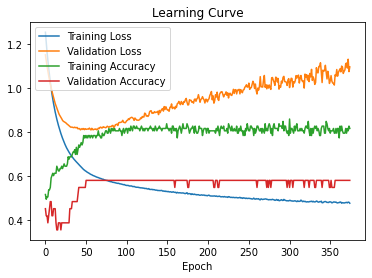

In [40]:

# Assigning new DataFrame to Data set variable
X = df_copy.values

# Number of trials with random combinations
num_trials = 15
for i in range(num_trials):
    
    # Random parameters
    params = {
        'units': np.random.choice(param_space['units']),
        'optimizer': np.random.choice(param_space['optimizer']),
        'learning_rate': np.random.choice(param_space['learning_rate']),
        'batch_size': np.random.choice(param_space['batch_size']),
        'epochs': np.random.choice(param_space['epochs']),
        'weight_decay': np.random.choice(param_space['weight_decay']),
        'momentum': np.random.choice(param_space['momentum']),
        'loss': np.random.choice(param_space['loss']),
        'activation': np.random.choice(param_space['activation']),
        'output_activation': np.random.choice(param_space['output_activation']),
        'metrics': np.random.choice(param_space['metrics']),
    }

    # Building the model
    model = Sequential()

    #Trial  8: Units=4, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231D709B880>, Learning Rate=0.4, Weight Decay=0.01, Epochs=375, Batch Size=8, Momentum=0.8 Training Accuracy=0.8468, Validation Accuracy=0.8387
    # Trial 14: Units=4, Optimizer: <keras.src.optimizers.sgd.SGD object at 0x00000231EAF47790>,Learning Rate=0.3, Weight Decay=0.02, Epochs=375, Batch Size=16, Momentum=0.9 Accuracy=0.8629


    # Add fully connected units to the NN
    model.add(Dense(units=params['units'], activation=params['activation'], kernel_regularizer=regularizers.l2(params['weight_decay']), use_bias=True))
    model.add(Dense(units=1, activation=params['output_activation'], use_bias=True))
    
    # Set the optimizer with the sampled learning rate
    if params['optimizer'] == 'adam':
        optimizer = optimizers.Adam()
    elif params['optimizer'] == 'sgd':
        optimizer = optimizers.SGD()
    else:
        raise ValueError("Unsupported optimizer")

    # Sets the Loss Function, the Optimizer used in the model and the Metrics used for evaluation
    model.compile(loss=params['loss'], optimizer="sgd", metrics=params['metrics'],)

    # Sets the Early Stopping for the model
    #early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Training of the model with validation split
    history = model.fit(
        x=X,
        y=y,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_split=0.25,  # 25% of the data will be used for validation
        verbose=0
    )

    # Evaluate on both training and validation sets
    loss, training_accuracy = model.evaluate(X, y, verbose=0)
    validation_accuracy = history.history['val_accuracy'][-1]


    # Reset of the previous Plot
    plt.figure()

    # Plot the learning curve
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    plt.legend()

  # Print the used parameters and both training and validation accuracies
    print(f"Trial {i:>2}: Units={params['units']}, Optimizer: {optimizer}, "
          f"Learning Rate={params['learning_rate']}, Weight Decay={params['weight_decay']}, "
          f"Epochs={params['epochs']}, Batch Size={params['batch_size']}, "
          f"Momentum={params['momentum']} Training Accuracy={training_accuracy:.4f}, "
          f"Validation Accuracy={validation_accuracy:.4f}")

    # Print of the Plot
    plt.show()